## R F M Analysis on Online Retail Dataset

In [1]:
import pandas as pd
import numpy as np

In [10]:
file_path = r"C:\Users\prasa\Desktop\online_retail_II.xlsx"
df1 = pd.read_excel(file_path,sheet_name = "Year 2009-2010")
df2 = pd.read_excel(file_path,sheet_name = "Year 2010-2011")

In [11]:
(df1.shape, df2.shape)

((525461, 8), (541910, 8))

In [12]:
df1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


3. Missing Values

In [13]:
#check for missing values in the data
missing_values = df1.isnull().sum()
print(missing_values)

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


In [14]:
missing_values = df2.isnull().sum()
print(missing_values)

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64


In [15]:
# Remove Missing Values
df1.dropna(inplace = True)
df2.dropna(inplace = True)

In [16]:
# 2009-2010
df1.describe([0.01, 0.05, 0.10, 0.20, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,20%,50%,90%,95%,99%,max
Quantity,417534.0,12.758815,101.220424,-9360.0,-2.00,1.00,1.00,1.00,4.00,24.00,36.0,144.00,19152.00
Price,417534.0,3.887547,71.131797,0.0,0.29,0.42,0.65,0.85,1.95,6.75,8.5,14.95,25111.09
Customer ID,417534.0,15360.645478,1680.811316,12346.0,12435.00,12725.00,13042.00,13624.00,15311.00,17706.00,17913.0,18196.00,18287.00


In [17]:
# 2010-2011
df2.describe([0.01, 0.05, 0.10, 0.20, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,20%,50%,90%,95%,99%,max
Quantity,406830.0,12.061276,248.693065,-80995.0,-2.00,1.00,1.00,1.00,5.00,24.00,36.0,120.0,80995.0
Price,406830.0,3.460507,69.315080,0.0,0.21,0.42,0.55,0.85,1.95,6.75,8.5,15.0,38970.0
Customer ID,406830.0,15287.684160,1713.603074,12346.0,12415.00,12626.00,12876.00,13536.00,15152.00,17719.00,17905.0,18212.0,18287.0


Remove negative values!

Negative values are returned items.

In [19]:
df1 = df1[~df1["Invoice"].str.contains("C", na = False)]
df2 = df2[~df2["Invoice"].str.contains("C", na = False)]

In [20]:
df1.describe([0.01, 0.05, 0.10, 0.20, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,20%,50%,90%,95%,99%,max
Quantity,407695.0,13.586686,96.842229,1.0,1.00,1.00,1.00,2.00,5.00,24.00,36.0,144.00,19152.0
Price,407695.0,3.294188,34.756655,0.0,0.29,0.42,0.65,0.85,1.95,6.75,8.5,14.95,10953.5
Customer ID,407695.0,15368.504107,1679.795700,12346.0,12435.00,12731.00,13044.00,13635.00,15321.00,17706.00,17913.0,18196.00,18287.0


In [21]:
df2.describe([0.01, 0.05, 0.10, 0.20, 0.90, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,20%,50%,90%,95%,99%,max
Quantity,397925.0,13.021793,180.419984,1.0,1.00,1.00,1.00,2.00,6.00,24.00,36.0,120.00,80995.00
Price,397925.0,3.116212,22.096773,0.0,0.21,0.42,0.55,0.85,1.95,6.35,8.5,14.95,8142.75
Customer ID,397925.0,15294.308601,1713.172738,12346.0,12415.00,12627.00,12883.00,13552.00,15159.00,17725.00,17912.0,18211.00,18287.00


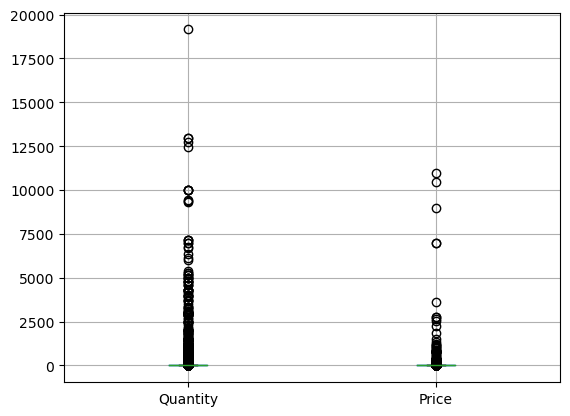

In [22]:
df1[["Quantity", "Price"]].boxplot();

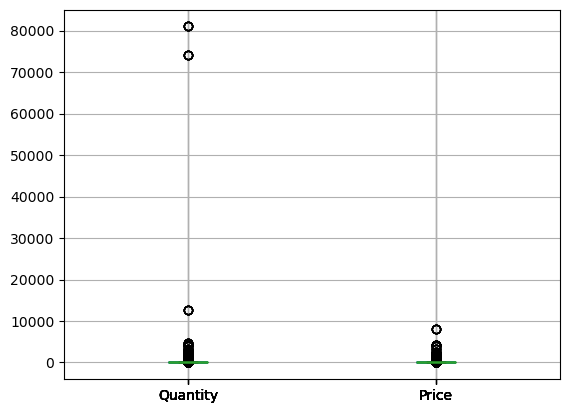

In [29]:
import matplotlib.pyplot as plt
df2[["Quantity", "Price"]].boxplot()
plt.show()

## 5. RFM Analysis
## Recency

In [30]:
print("2009-2010: Min Date", df1["InvoiceDate"].min(), "Max Date", df1["InvoiceDate"].max())
print("2010-2011: Min Date", df2["InvoiceDate"].min(), "Max Date", df2["InvoiceDate"].max())

2009-2010: Min Date 2009-12-01 07:45:00 Max Date 2010-12-09 20:01:00
2010-2011: Min Date 2010-12-01 08:26:00 Max Date 2011-12-09 12:50:00


In [32]:
import datetime as dt  # Import datetime module

# Calculate Recency
recency1 = (dt.datetime(2010, 12, 9) - df1.groupby("Customer ID").agg({"InvoiceDate": "max"})).rename(columns={"InvoiceDate": "Recency"})
recency2 = (dt.datetime(2011, 12, 9) - df2.groupby("Customer ID").agg({"InvoiceDate": "max"})).rename(columns={"InvoiceDate": "Recency"})

# Convert timedelta to days
recency1["Recency"] = recency1["Recency"].apply(lambda x: x.days)
recency2["Recency"] = recency2["Recency"].apply(lambda x: x.days)

print(recency2.head())


             Recency
Customer ID         
12346.0          324
12347.0            1
12348.0           74
12349.0           17
12350.0          309


In [33]:
freq1 = df1.groupby("Customer ID").agg({"InvoiceDate":"nunique"}).rename(columns={"InvoiceDate": "Frequency"})
freq2 = df2.groupby("Customer ID").agg({"InvoiceDate":"nunique"}).rename(columns={"InvoiceDate": "Frequency"})

freq2

,Frequency
Customer ID,
12346.0,1
12347.0,7
12348.0,4
12349.0,1
12350.0,1
...,...
18280.0,1
18281.0,1
18282.0,2


## Monetary Value

In [34]:
df1["TotalPrice"] = df1["Quantity"] * df1["Price"]
df2["TotalPrice"] = df2["Quantity"] * df2["Price"]

monetary1 = df1.groupby("Customer ID").agg({"TotalPrice":"sum"}).rename(columns={"TotalPrice":"Monetary"})
monetary2 = df2.groupby("Customer ID").agg({"TotalPrice":"sum"}).rename(columns={"TotalPrice":"Monetary"})

monetary2.head()

,Monetary
Customer ID,
12346.0,77183.60
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40


In [35]:
rfm1 = pd.concat([recency1, freq1, monetary1],  axis=1)
rfm2 = pd.concat([recency2, freq2, monetary2],  axis=1)

rfm2.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,324,1,77183.60
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,17,1,1757.55
12350.0,309,1,334.40


Create RFM Score 

In [36]:
rfm1["RecencyScore"] = pd.qcut(rfm1["Recency"], 5, labels = [5, 4 , 3, 2, 1])
rfm2["RecencyScore"] = pd.qcut(rfm2["Recency"], 5, labels = [5, 4 , 3, 2, 1])

rfm1["FrequencyScore"]= pd.qcut(rfm1["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])
rfm2["FrequencyScore"]= pd.qcut(rfm2["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])

rfm1["MonetaryScore"] = pd.qcut(rfm1['Monetary'], 5, labels = [1, 2, 3, 4, 5])
rfm2["MonetaryScore"] = pd.qcut(rfm2['Monetary'], 5, labels = [1, 2, 3, 4, 5])

rfm2.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
Customer ID,,,,,,
12346.0,324,1,77183.60,1,1,5
12347.0,1,7,4310.00,5,5,5
12348.0,74,4,1797.24,2,4,4
12349.0,17,1,1757.55,4,1,4
12350.0,309,1,334.40,1,1,2


In [37]:
# RFM Scores: Category
rfm1["RFM_SCORE"] = (rfm1['RecencyScore'].astype(str) + 
                     rfm1['FrequencyScore'].astype(str) + 
                     rfm1['MonetaryScore'].astype(str))

rfm2["RFM_SCORE"] = (rfm2['RecencyScore'].astype(str) + 
                     rfm2['FrequencyScore'].astype(str) + 
                     rfm2['MonetaryScore'].astype(str))

rfm2.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12346.0,324,1,77183.60,1,1,5,115
12347.0,1,7,4310.00,5,5,5,555
12348.0,74,4,1797.24,2,4,4,244
12349.0,17,1,1757.55,4,1,4,414
12350.0,309,1,334.40,1,1,2,112


In [38]:
# RFM Scores: Category
rfm1["RFM_SCORE"] = (rfm1['RecencyScore'].astype(str) + 
                     rfm1['FrequencyScore'].astype(str) + 
                     rfm1['MonetaryScore'].astype(str))

rfm2["RFM_SCORE"] = (rfm2['RecencyScore'].astype(str) + 
                     rfm2['FrequencyScore'].astype(str) + 
                     rfm2['MonetaryScore'].astype(str))

rfm2.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12346.0,324,1,77183.60,1,1,5,115
12347.0,1,7,4310.00,5,5,5,555
12348.0,74,4,1797.24,2,4,4,244
12349.0,17,1,1757.55,4,1,4,414
12350.0,309,1,334.40,1,1,2,112


In [39]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

rfm1['Segment'] = rfm1['RecencyScore'].astype(str) + rfm1['FrequencyScore'].astype(str)
rfm1['Segment'] = rfm1['Segment'].replace(seg_map, regex=True)

rfm2['Segment'] = rfm2['RecencyScore'].astype(str) + rfm2['FrequencyScore'].astype(str)
rfm2['Segment'] = rfm2['Segment'].replace(seg_map, regex=True)

rfm2.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12346.0,324,1,77183.60,1,1,5,115,Hibernating
12347.0,1,7,4310.00,5,5,5,555,Champions
12348.0,74,4,1797.24,2,4,4,244,At Risk
12349.0,17,1,1757.55,4,1,4,414,Promising
12350.0,309,1,334.40,1,1,2,112,Hibernating


## Summary Statistics

In [40]:
rfmStats1 = rfm1[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["mean","median","count", "std"])
rfmStats1.columns = rfmStats1.columns.map('_'.join).str.strip('|')
rfmStats1

,Recency_mean,Recency_median,Recency_count,Recency_std,Frequency_mean,Frequency_median,Frequency_count,Frequency_std,Monetary_mean,Monetary_median,Monetary_count,Monetary_std
Segment,,,,,,,,,,,,
About to Sleep,51.851312,51.0,343,10.259985,1.201166,1.0,343,0.401458,442.266851,317.760,343,417.303449
At Risk,149.937807,128.0,611,69.978119,3.070376,3.0,611,1.092428,1188.207056,760.190,611,1844.174551
Can't Loose,121.717949,106.5,78,49.724409,9.038462,7.5,78,5.782738,4072.967051,2316.485,78,5275.397061
Champions,5.119155,5.0,663,4.619934,12.499246,8.0,663,17.189180,6852.264167,2508.320,663,21556.377144
Hibernating,212.309055,211.0,1016,89.780306,1.126969,1.0,1016,0.333102,401.982150,250.155,1016,775.076212
Loyal Customers,34.275908,29.0,743,16.064746,6.816958,5.0,743,4.376349,2743.484342,1818.710,743,3255.108992
Need Attention,51.212560,51.0,207,9.838168,2.454106,2.0,207,0.499096,1058.788068,730.470,207,1190.255349
New Customers,6.580000,6.5,50,4.309884,1.000000,1.0,50,0.000000,386.199200,258.825,50,493.321262
Potential Loyalists,16.773256,17.0,516,9.730991,2.023256,2.0,516,0.696344,729.164806,523.660,516,837.546248


In [41]:
rfmStats2 = rfm2[["Segment","Recency","Frequency", "Monetary"]].groupby("Segment").agg(["mean","median","count", "std"])
rfmStats2.columns = rfmStats2.columns.map('_'.join).str.strip('|')
rfmStats2

,Recency_mean,Recency_median,Recency_count,Recency_std,Frequency_mean,Frequency_median,Frequency_count,Frequency_std,Monetary_mean,Monetary_median,Monetary_count,Monetary_std
Segment,,,,,,,,,,,,
About to Sleep,51.365439,51.0,353,10.973089,1.161473,1.0,353,0.368489,472.548640,331.950,353,532.933850
At Risk,152.038721,137.0,594,68.640154,2.867003,3.0,594,0.940465,1079.814126,675.160,594,2559.612421
Can't Loose,130.046875,105.0,64,65.148775,8.312500,7.0,64,4.143746,2791.010625,2236.740,64,2074.240885
Champions,4.367089,3.0,632,3.683784,12.340190,8.0,632,16.372248,6866.779209,2613.850,632,20354.664347
Hibernating,215.658559,217.0,1069,92.038617,1.100094,1.0,1069,0.300265,488.858711,293.000,1069,2421.941489
Loyal Customers,31.685366,28.0,820,15.601369,6.441463,5.0,820,4.450267,2862.890830,1737.830,820,6003.490267
Need Attention,50.271739,50.0,184,11.533371,2.320652,2.0,184,0.468001,894.490272,637.775,184,1110.270072
New Customers,5.428571,6.0,42,3.902112,1.000000,1.0,42,0.000000,388.212857,274.505,42,570.776294
Potential Loyalists,15.368313,16.0,486,9.342407,2.012346,2.0,486,0.654762,1041.335720,523.995,486,7640.534349


Tree Map to visualaize number of customers


In [45]:
import plotly.express as px
import pandas as pd

# Manually creating the DataFrame from your provided data
data = {
    "Segment": [
        "About to Sleep", "At Risk", "Can't Loose", "Champions", "Hibernating", 
        "Loyal Customers", "Need Attention", "New Customers", 
        "Potential Loyalists", "Promising"
    ],
    "Customer_Count": [353, 594, 64, 632, 1069, 820, 184, 42, 486, 95]
}

# Convert to DataFrame
rfmStats1 = pd.DataFrame(data)

# Create Treemap
fig = px.treemap(rfmStats1, 
                 path=['Segment'], 
                 values='Customer_Count',  
                 color='Customer_Count',  
                 color_continuous_scale='blues',
                 title="Customer Distribution by Segment")

fig.show()

In [46]:
import plotly.express as px
import pandas as pd

# Manually creating the DataFrame from your provided data
data = {
    "Segment": [
        "About to Sleep", "At Risk", "Can't Loose", "Champions", "Hibernating", 
        "Loyal Customers", "Need Attention", "New Customers", 
        "Potential Loyalists", "Promising"
    ],
    "Customer_Count": [353, 594, 64, 632, 1069, 820, 184, 42, 486, 95]
}

# Convert to DataFrame
rfmStats2 = pd.DataFrame(data)

# Create Treemap
fig = px.treemap(rfmStats2, 
                 path=['Segment'], 
                 values='Customer_Count',  
                 color='Customer_Count',  
                 color_continuous_scale='blues',
                 title="Customer Distribution by Segment")

fig.show()